In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [5]:
base_out="/net/pc230050/nobackup/users/duinen/LENTIS/present/pr_d_anomaly/"
pr = xr.open_dataset(base_out + "pr_clim_ensmean.nc")

In [39]:
# manually past last 6 days in the beginning of the time dimension, for the rolling mean to work. Later deleted again
last_six_days = pr.isel(time=slice(-6, None))
pr_clim_mean_extended = xr.concat([last_six_days, pr], dim="time")
pr_clim_mean_extended['pr'] = pr_clim_mean_extended.pr.rolling(time = 7).mean()
pr_clim_mean = pr_clim_mean_extended.isel(time=slice(6, None))
pr_clim_mean.to_netcdf(base_out + "pr_clim_ensmean_7d.nc")

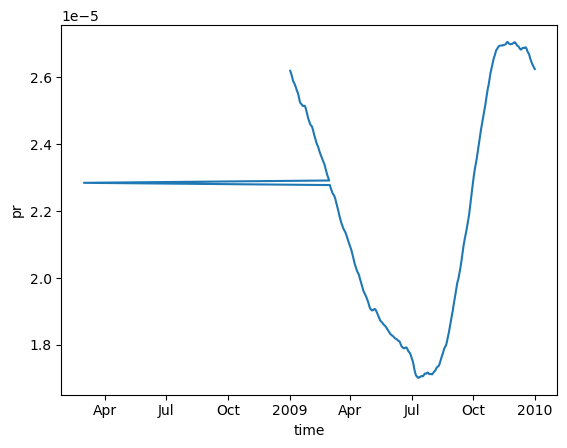

In [40]:
pr_clim_mean.pr.mean(dim = ["lat", "lon"]).plot() # check for smoothness